# Library demo and figures

In [5]:
import graph_structure as gs
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# Point clouds: A and B
n_points = 10
n_dim = 2 # Two dimensions so we can plot them without using dirty tricks

# This is the noise level
snr = 10 # dB
def alpha_from_snr(snr):
    return 10**(-snr / 20)
   
alpha = alpha_from_snr(snr)
A = np.random.randn(n_points, n_dim)
B = A + alpha * np.random.randn(n_points, n_dim)

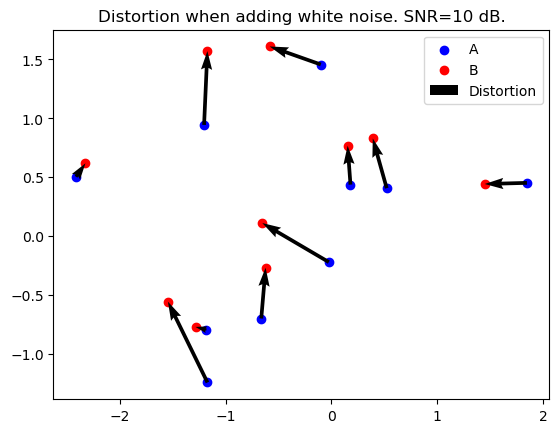

In [25]:
plt.figure()
plt.scatter(A[:,0], A[:,1], c='b', label='A')
plt.scatter(B[:,0], B[:,1], c='r', label='B')
plt.quiver(A[:,0], A[:,1], B[:,0]-A[:,0], B[:,1]-A[:,1], angles='xy', scale_units='xy', scale=1, label='Distortion')
plt.title(f'Distortion when adding white noise. SNR={snr} dB.')
plt.legend()
plt.show()

In [ ]:
# Nearest neighbors
